## Classification Models

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

In [128]:
df = pd.read_csv('./health_outcomes.csv')
df.head()


,county_name,population,pop_change_2010,perc_under_18,perc_csec,perc_lowbirth,perc_prenat_1tri,perc_preterm,perc_non_smoke,fert_15_44,...,perc_smoker,hiv_tested,perc_no_healthins,perc_obese,perc_routine_checkup,beds_per_1000,inpatient_occupancy_rate,admission_per_1000,Total_MetGoals,MetGoal_Reached
0,York,449058.0,3.2,21.9,30.1,8.4,74.6,9.9,88.6,60.3,...,16.0,40.0,8.0,30.0,88.0,1.6,79.8,87.0,1.0,1
1,Clinton,38632.0,-1.5,19.5,27.3,6.8,68.8,8.8,82.9,52.5,...,21.0,33.0,8.0,36.0,89.0,0.6,27.9,19.0,2.0,1
2,Susquehanna,40328.0,-7.0,18.4,31.8,7.2,64.2,9.1,78.0,61.4,...,19.0,42.0,10.0,35.0,88.0,1.2,27.6,33.5,1.0,1
3,Northampton,305285.0,2.5,19.8,32.7,8.2,78.2,9.5,89.9,50.9,...,18.0,45.0,6.0,32.0,89.0,1.1,43.2,44.7,4.0,1
4,Jefferson,43425.0,-3.9,21.1,26.4,8.0,71.8,8.5,79.9,66.6,...,27.0,35.0,10.0,41.0,86.0,1.9,41.5,46.4,3.0,1


In [130]:
df['MetGoal_Reached'].value_counts()

1    116
0    111
Name: MetGoal_Reached, dtype: int64

In [134]:
df.columns

Index(['county_name', 'population', 'pop_change_2010', 'perc_under_18',
       'perc_csec', 'perc_lowbirth', 'perc_prenat_1tri', 'perc_preterm',
       'perc_non_smoke', 'fert_15_44', 'birth_rate_15_19', 'birth_rate_20_24',
       'birth_rate_25_29', 'birth_rate_30_34', 'birth_date_35_39',
       'birth_rate_40_44', 'all_cause_death', 'chlam_per_100000',
       'gono_per_100000', 'perc_smoker', 'hiv_tested', 'perc_no_healthins',
       'perc_obese', 'perc_routine_checkup', 'beds_per_1000',
       'inpatient_occupancy_rate', 'admission_per_1000', 'Total_MetGoals',
       'MetGoal_Reached'],
      dtype='object')

## KNN Classifier

In [135]:
data = df.columns[1:-2]
target = df.columns[-1]

In [136]:
X = df[data]
y = df[target]
y=y.astype('int')


# To calculate mean use imputer class
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
  
X = imputer.transform(X)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=60)
  
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)                                    
print(knn.predict(X_test))

[0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0
 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0]


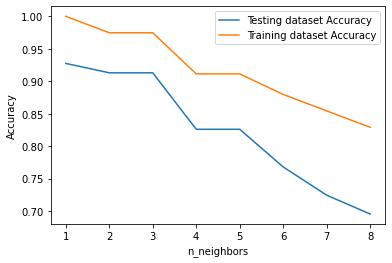

In [138]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

## Cluster Plots

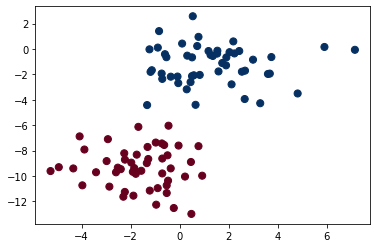

In [139]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

## Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [141]:
norm = StandardScaler().fit(X_train)

## Do cross-val --> test different hyperparameters: C values, try L1 & L2 norms
logreg = LogisticRegression(max_iter=5000)
logreg.fit(norm.transform(X_train), y_train)
logreg.score(norm.transform(X_train), y_train)

0.9810126582278481

## Random Forest Classifier

In [142]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
# using only binary
## test hyperparameters
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.9710144927536232

In [ ]:
## expand possible classifications
rf2 = RandomForestClassifier()
